In [2]:
import pandas as pd

features_filepath = '340_Veri_toplam_temiz.xlsx'
feats_df = pd.read_excel(features_filepath)
feats_df.head()

,Date,Station,CDOM (RFU),CDOM (µg/L),Klorofil-a (µg/L),Tuzluluk (‰),TDS (mg/l),Secchi Disk (m),Çözünmüş Oksijen (mg/l),Elektriksel İletkenlik (µs/cm),...,Sıcaklık (ÇO) (°C),Sıcaklık (Eİ) (°C),Toplam Azot (µg/l),Toplam Fosfor (mg/L) PO4-P,Toplam Fosfor (µg/L),Sıcaklık ort,Kuzey,Dogu,X,Y
0,2017-04-27,1,8936.96,79.45,86.14,0.70,707,0.33,10.84,1456,...,15.6,14.9,6000,0.075,75,15.25,41561,36078,235,537
1,2017-04-27,2,9912.94,87.98,61.24,0.73,684,0.38,10.63,1404,...,16.7,14.7,4900,0.088,88,15.70,41571,36083,280,427
2,2017-04-27,3,7921.96,67.57,48.40,0.75,703,0.38,10.32,1377,...,16.3,15.9,7600,0.087,87,16.10,41579,36088,325,340
3,2017-04-27,4,9071.61,79.86,39.70,0.80,811,0.32,10.54,1569,...,16.3,15.5,4760,0.064,64,15.90,41586,36090,345,263
4,2017-04-27,5,8817.51,77.11,72.52,0.83,836,0.30,10.59,1634,...,16.0,14.6,7100,0.070,70,15.30,41595,36096,398,165


In [3]:
print(f"Number of Dates: {len(feats_df['Date'].value_counts().keys())}")

print(f"Number of Stations: {len(feats_df['Station'].value_counts().keys())}")

Number of Dates: 34
Number of Stations: 10


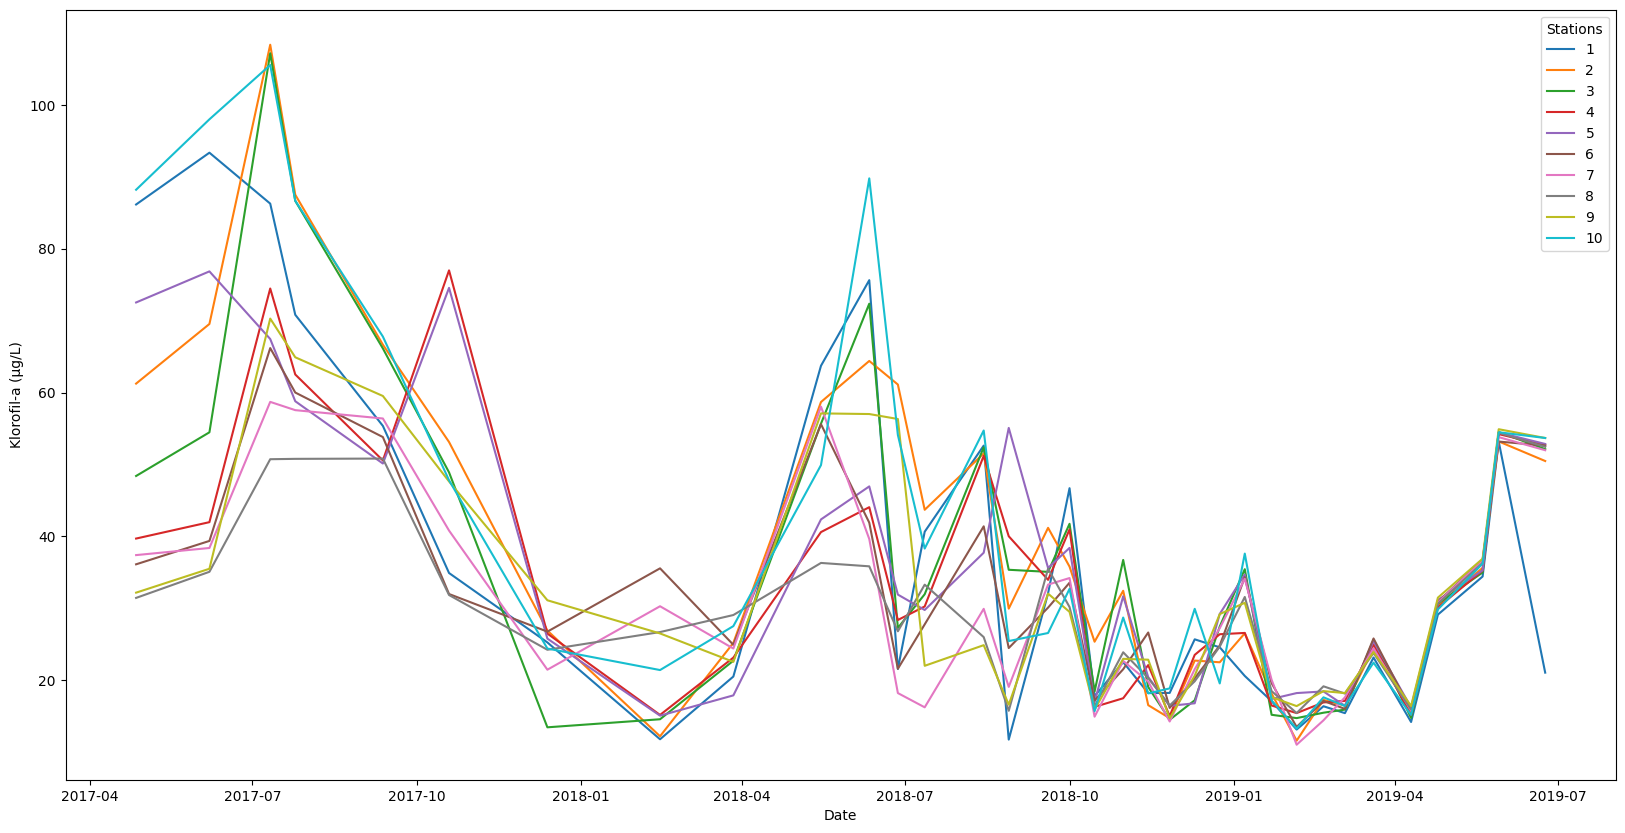

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_feature = 'Klorofil-a (µg/L)'

fig, ax = plt.subplots(figsize=(20, 10))

for station in feats_df['Station'].value_counts().keys():
    sns.lineplot(x='Date', y=selected_feature, data=feats_df[feats_df['Station'] == station], ax=ax, label=station)

plt.legend(title='Stations')
plt.show()

In [5]:
feats_df = feats_df[['Date', 'Station', selected_feature, 'X', 'Y']]
feats_df.head()

,Date,Station,Klorofil-a (µg/L),X,Y
0,2017-04-27,1,86.14,235,537
1,2017-04-27,2,61.24,280,427
2,2017-04-27,3,48.40,325,340
3,2017-04-27,4,39.70,345,263
4,2017-04-27,5,72.52,398,165


In [6]:
years = {}
for date in feats_df['Date']:
    year = date.year
    if year in years:
        years[year] += 1
    else:
        years[year] = 1
print(years)
print(f'2017 % {years[2017]/sum(years.values())*100} | 2018 % {years[2018]/sum(years.values())*100} | 2019 % {years[2019]/sum(years.values())*100}')

{2017: 70, 2018: 160, 2019: 110}
2017 % 20.588235294117645 | 2018 % 47.05882352941176 | 2019 % 32.35294117647059


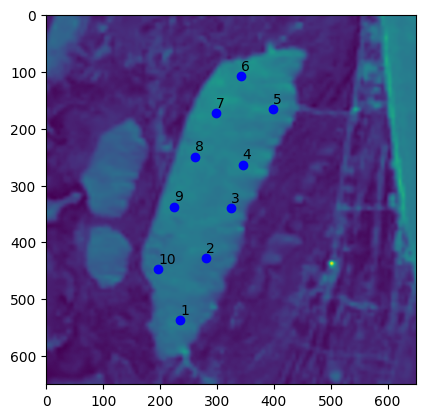

In [22]:
import matplotlib.pyplot as plt
import h5py
import numpy as np

# (station, x, y)
stations = []
for station in feats_df['Station'].unique():
    stations.append((station, feats_df[feats_df['Station'] == station]['X'].values[0], feats_df[feats_df['Station'] == station]['Y'].values[0]))
stations

def plot_stations(stations):
    with h5py.File('./data/3/level2a.h5', 'r') as f:
        a_group_key = list(f.keys())[0]
        image = np.array(f[a_group_key])

    fig, ax = plt.subplots()
    ax.imshow(image[0,:,:])
    for station in stations:
        _, x, y = station
        ax.scatter(x, y, c='blue')
        ax.annotate(station[0], (x, y-10))
    plt.show()

plot_stations(stations)